In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [1]:

# #Initialize the tracker
# tracker = Tracker(model_path=model_path)
# tracks = tracker.get_objects_tracks(video_frames, read_from_stub=True,
#                                     stub_path="stubs/track_stubs.pkl")


#  # save cropped image of a players
# for track_id, player in tracks["players"][0].items():
#     bbox = player["bbox"]
#     frame = video_frames[0]

#     # crop bbox from frame
#     cropped_frame = frame[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]

#     # save cropped image
#     cv2.imwrite(f"output_videos/cropped_img.jpg", cropped_frame)

#     break

In [2]:
image_path = '../output_videos/cropped_img.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

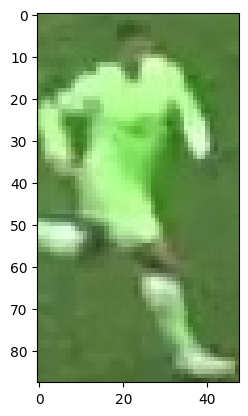

In [5]:
plt.imshow(image)
plt.show()

# Take the top half of the image

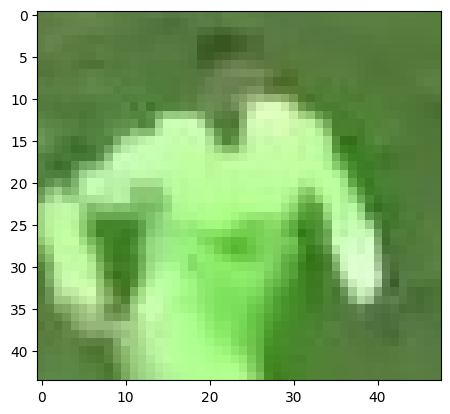

In [13]:
top_half = image[0 : int(image.shape[0]/2), :]
plt.imshow(top_half)

# Cluster the image into 2 clusters

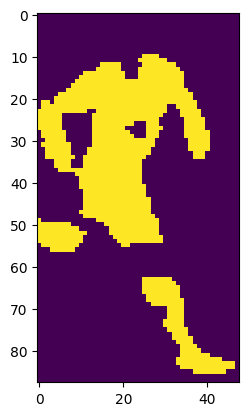

In [20]:
# reshape the image into a 2D array of pixels
image_2d_ = image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(image_2d_)

# get the cluster labels
labels = kmeans.labels_

# reshape the label into the original image shape
clustered_image_ = labels.reshape(image.shape[0], image.shape[1])

# display the clustered image
plt.imshow(clustered_image_)

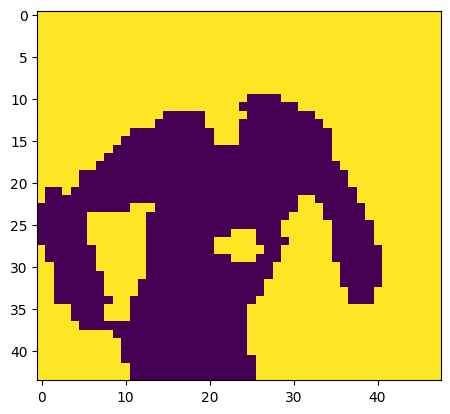

In [21]:
# reshape the image into a 2D array of pixels
image_2d = top_half.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the label into the original image shape
clustered_image = labels.reshape(top_half.shape[0], top_half.shape[1])

# display the clustered image
plt.imshow(clustered_image)

In [22]:
cornered_cluster = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(cornered_cluster, key=cornered_cluster.count)
print(non_player_cluster)

1


In [24]:
player_cluster  = 1 - non_player_cluster
print(player_cluster)

0


In [25]:
kmeans.cluster_centers_[player_cluster]

array([171.24867725, 235.64417989, 142.80026455])